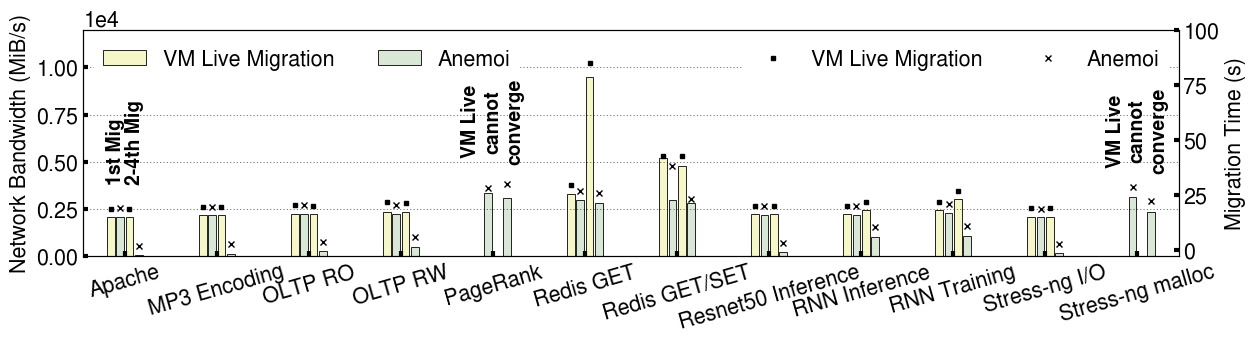

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
from statistics import mean
from common import *

# font["font.size"] = 13
# plt.rcParams.update(font)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

plt.rc('font', family='Nimbus Sans L', weight='medium', size=15.5)
# plt.rc('font', family='DejaVu Serif', weight='medium', size=13)

plt.rcParams['hatch.color'] = '#636466'
plt.rcParams['hatch.linewidth'] = 1

# name = ["BT.A", "CG.B", "DC.W", "EP.C", "FT.B", "IS.C",
#         "LU.A", "MG.C", "SP.A", "UA.W"]

name = ["Apache", "MP3 Encoding", "OLTP RO", "OLTP RW", "PageRank", "Redis GET", "Redis GET/SET", "Resnet50 Inference",
        "RNN Inference", "RNN Training", "Stress-ng I/O", "Stress-ng malloc"]

# clique = np.array(
#     [1.368111799, 1.124625749, 1.324786325, 1.003026373, 0.994180062, 1.194092827, 1.145605387, 1.538135853,
#      2.020523498, 1.318777293])
#
# nb = np.array(
#     [0.907575036, 0.954865269, 0.995641026, 0.94638997, 0.445799351, 0.926160338, 0.904172177, 0.378904093, 0.901150109,
#      0.887918486])
#
# clique_l = np.array(
#     [344.6, 150.25, 0.155, 23.2, 251.11, 5.66, 190.56, 250.67, 203.79, 0.0906])
#
# normarl_l = np.array(
#     [251.88, 133.6, 0.12, 23.13, 252.58, 4.74, 166.34, 162.97, 100.86, 0.0687])
#
# nb_l = np.array(
#     [228.6, 127.57, 0.12, 21.89, 112.6, 4.39, 150.4, 61.75, 90.89, 0.061])

vanilla0 = np.array([2100.83, 2171.81, 2261.76, 2333.44, 0, 3275.33, 5232.42, 2219.35, 2252.35, 2451.50, 2075.47, 0])
yanni0 = np.array(
    [2101.05, 2172.36, 2236.89, 2248.31, 3364.72, 2984.97, 3002.03, 2195.81, 2209.81, 2316.21, 2084.53, 3163.77])

vanilla1 = np.array([2094.96, 2178.7, 2245.63, 2337.38, 0, 10569.46, 4246.4, 2228.39, 2291.67, 3083.01, 2076.38, 0])
yanni1 = np.array([66.68, 142.41, 306.17, 490.82, 3041.83, 2939.2, 3855.45, 289.78, 1122, 971.67, 452, 2609.95])

vanilla2 = np.array([2099.71, 2173.97, 2258.99, 2301.25, 0, 8340.56, 4955.32, 2236.14, 2541.9, 2932.40, 2075.54, 0])
yanni2 = np.array([79.71, 137.5, 268.81, 519.07, 3355.01, 2748.51, 2368.15, 177.42, 1076.04, 1376.47, 75.38, 2201.72])

vanilla3 = np.array([2099.52, 2196.85, 2244.55, 2352.23, 0, 9598.93, 5130.36, 2226.6, 2522.22, 3025.43, 2074.9, 0])
yanni3 = np.array([66.43, 136.98, 250.11, 526.46, 2930.97, 2829.33, 2271.73, 229.36, 889.08, 943.64, 48.66, 2213.55])

for i in range(len(vanilla0)):
    vanilla1[i] = mean([vanilla1[i], vanilla2[i], vanilla3[i]])
    yanni1[i] = mean([yanni1[i], yanni2[i], yanni3[i]])

data = [vanilla0, yanni0, vanilla1, yanni1]
x = np.arange(len(name))

y = np.array([0] * len(x))
for i in range(len(data)):
    data[i] = data[i] + y
# for i in range(len(name)):
#     name[i] = name[i] + '\n' + str(normal[i])
    
# colors = ["#fcfcd8", "#f4f8c2", "#d9ecb8", "#bcdfba", "#a7d5b9", "#6db8be", "#3b7cb1", "#1e307c"]
colors = ["#f5f7c8", "#d9e7d6", "#7eb6bd"]

width = 0.1

# sep = 0.01
zoom = 0.85

vstr = "VM Live Migration"
ystr = "Anemoi"

fig, ax1 = plt.subplots()

fig.set_size_inches(12.705, 3.7)


def autolabel(ax, rects, array, heights):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in range(len(rects)):
        rect = rects[i]
        height = heights[i]
        s = "{:.2f}".format(array[i])
        l = len(s)
        if l == 5:
            offset = -0.01
        else:
            offset = 0
        # if height < 0:
        #     offset = height - 40 - len(s) * 1.1
        # else:
        #     offset = 0 - 40 - len(s) * 1.1
        ax.text(s=s,
                x=rect.get_x() + rect.get_width() / 2 + 0.02, y=height - offset,

                va='bottom', size=11, rotation=90, ha='center', weight='bold')


b1 = ax1.bar(x - 3 * width / 2, vanilla0, width * zoom,
             color=colors[0], edgecolor="black", label=vstr, linewidth=0.6)

b2 = ax1.bar(x - 1 * width / 2, yanni0, width * zoom,
             color=colors[1], edgecolor="black", label=ystr, linewidth=0.6)

b3 = ax1.bar(x + 1 * width / 2, vanilla1, width * zoom,
             color=colors[0], edgecolor="black", linewidth=0.6)

b4 = ax1.bar(x + 3 * width / 2, yanni1, width * zoom,
             color=colors[1], edgecolor="black", linewidth=0.6)

#b5 = ax1.bar(x + 1 * width / 2, vanilla2, width * zoom,
#             color=colors[0], edgecolor="black", linewidth=0.6)

#b6 = ax1.bar(x + 3 * width / 2, yanni2, width * zoom,
#             color=colors[1], edgecolor="black", linewidth=0.6)

#b7 = ax1.bar(x + 5 * width / 2, vanilla3, width * zoom,
#             color=colors[0], edgecolor="black", linewidth=0.6)

#b8 = ax1.bar(x + 7 * width / 2, yanni3, width * zoom,
#             color=colors[1], edgecolor="black", linewidth=0.6)

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
#
#
# def to_percent(temp, position):
#     return '%1.1f' % (temp) + 'X'
#
#
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(to_percent))

# plt.xlim(-0.5, 9.5)
# plt.ylim(min(nb) - 50, max(clique) + 1)

# plt.yticks([-90, -60, -30, 0, 30, 60, 90, 120])
# plt.xlabel('# vCPUs')
# plt.yticks([])
# plt.ylabel('Percentage of Improvement')
plt.xticks(x, name, rotation=16, size=11)

# g = lambda x, pos: "${}$".format(f._formatSciNotation('%1.1e' % x))
# plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))

# plt.yscale('log')

plt.grid(axis='y', linewidth=0.4, linestyle=(0, (2, 4)), color="#000000")

# ax1.legend(loc="upper left", frameon=False, prop={'size': 13}, ncol=2)

ax1.legend(facecolor='white', framealpha=1.0,
              loc='upper left', frameon=True, ncol=2, edgecolor='white')

# plt.legend(
#     mode="expand", loc="upper center",
#     ncol=3, frameon=False)


# plt.subplots_adjust(top=1.2)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# plt.plot([9.5,9.5],[min(nb)-80, max(clique)+1], linewidth=1.5, color='black')
plt.xlim([0 - 8 * width / 2 - 0.05, max(x) + 8 * width / 2 + 0.05])

ax1.set_ylim(0.0, 12000)

# plt.text(s="Never Converge",
#          x=4 - 2 * width, y=0.05,
#
#          va='bottom', size=11, rotation=90, ha='center')
#
# plt.text(s="Never Converge",
#          x=11 - 2 * width, y=0.05,
#
#          va='bottom', size=11, rotation=90, ha='center')


plt.text(s="1st Mig",
         x=0 - 1 * width, y=vanilla0[0] + 1700,
         va='bottom', rotation=90, ha='center', weight='bold',size=14)

plt.text(s="2-4th Mig",
         x=0 + 1 * width, y=vanilla0[0] + 1700,
         va='bottom', rotation=90, ha='center', weight='bold',size=14)

#plt.text(s="0 to 1",
#         x=0 + 1 * width, y=vanilla0[0] + 1700,
#         va='bottom', size=10, rotation=90, ha='center', weight='bold')

#plt.text(s="1 to 0",
#         x=0 + 3 * width, y=vanilla0[0] + 1700,
#         va='bottom', size=10, rotation=90, ha='center', weight='bold')

plt.text(s="VM Live\ncannot\nconverge",
         x=4, y=yanni0[4] + 1500,
         va='bottom', rotation=90, ha='center', weight='bold',size=14)

plt.text(s="VM Live\ncannot\nconverge",
         x=11, y=yanni0[4] + 1000,
         va='bottom', size=14, rotation=90, ha='center', weight='bold')

ax2 = ax1.twinx()

xs = []
for i in range(12):
    xs.append([i - 3 * width / 2, i + 1 * width / 2])
    xs.append([i - 1 * width / 2, i + 3 * width / 2])

ys = [[18.72,
       18.79,
       18.68,
       18.74],
      [18.87,
       1.84,
       1.89,
       1.73],
      [19.39,
       19.43,
       19.39,
       19.59],
      [19.51, 2.33,
       2.55,

       2.49],
      [20.17,
       20.02,
       20.17,
       20.05],
      [20.13, 3.14,
       3.65,

       3.66],
      [21.76,
       21.82,
       20.52,
       20.98],
      [20.18, 5.43,
       5.96,

       5.97],
      [0, 0, 0, 0],
      [28.27,
       31.43,
       30.18,
       27.46],
      [29.21,
       85.66,
       74.39,
       94.22],
      [26.66,
       25.3,
       26.75,
       25.92],
      [42.68,
       37.99,
       44.22,
       45.76],
      [38.26,
       21.74,
       26.91,
       20.87],
      [19.83,
       19.89,
       19.93,
       19.89],
      [19.71, 3.76,
       2.76,

       3], [20.09,
            20.48,
            22.7,
            22.52],
      [19.84, 11.36,
       10.49,

       9.45],
      [21.86,
       27.48,
       26.15,
       26.97],
      [20.84, 9.76,
       13.14,

       9.69], [18.97,
               18.99,
               18.64,
               18.96], [18.73, 4.89,
                        1.79,

                        1.51], [0, 0, 0, 0], [28.41, 24.36,
                                              20.73,

                                              20.88]
      ]

for i in range(len(ys)):
    y = ys[i]
    y0 = y[0]
    y1 = mean(y[1:])
    ys[i] = [y0, y1]

for i in range(1):
    ax2.plot(xs[2 * i], ys[2 * i], marker="s", markersize=3.5, label="VM Live Migration", color=colors[1],
             markerfacecolor='black',
             markeredgecolor="black", linestyle="None")
    ax2.plot(xs[2 * i + 1], ys[2 * i + 1], marker="x", markersize=5, label="Anemoi", color=colors[1],
             markerfacecolor='black', markeredgecolor="black", linestyle="None")

for i in range(1, 12):
    ax2.plot(xs[2 * i + 1], ys[2 * i + 1], marker="x", markersize=5, color=colors[1],
             markerfacecolor='black', markeredgecolor="black", linestyle="None")
    if ys[2*i][0] == 0:
        continue
    ax2.plot(xs[2 * i], ys[2 * i], marker="s", markersize=3.5, color=colors[1], markerfacecolor='black',
             markeredgecolor="black", linestyle="None")

# plt.text(-0.4, 2.2, "Unit = Mop/s/thread")
ax1.set_ylabel("Network Bandwidth (MiB/s)")
ax2.set_ylabel("Migration Time (s)")

ax2.set_ylim(-3, 100)


# ax2.legend(loc="upper right", frameon=False, prop={'size': 13}, ncol=2)

ax2.legend(facecolor='white', framealpha=1.0,
              loc='upper right', frameon=True, ncol=2, edgecolor='white')

ax1.tick_params(labelsize='medium', width=3, color="black")
ax2.tick_params(labelsize='medium', width=3, color="black")

ax1.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')


plt.tight_layout()

plt.savefig('./imgs/_bandwidth.pdf', dpi=300, bbox_inches='tight')
plt.show()

plt.close()